In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pybaseball.retrosheet import *

## Sabremetrics Final Project
Adjusted Park Factors to account for pitching


Below is testing code for one year. Run and tinker with if wanted to see how it works without affecting the whole assignment

In [3]:
game=season_game_logs(2018)
teams=game["home_team"]
teams=set(teams)
teams=list(teams)
teama=pd.DataFrame()
teama["Team"]=teams
teama["Year"]=2018
games=game[["visiting_team","home_team","visiting_score","home_score",]]
homegamen=games.groupby("visiting_team").count()
waygamen=games.groupby("home_team").count()
homegamen=homegamen["home_team"]
waygamen=waygamen["visiting_team"]
homegamea=games.groupby("home_team").mean()
waygamea=games.groupby("visiting_team").mean()
waygamea.index.names=["Team"]
waygamea["Year"]=2018
teama=pd.merge(teama,waygamea,on=["Team","Year"])
teama=teama.rename(columns={"visiting_score":"Away Visiting Score","home_score":"Away Home Score"})
homegamea.index.names=["Team"]
homegamea["Year"]=2018
teama=pd.merge(teama,homegamea,on=["Team","Year"])
teama=teama.rename(columns={"visiting_score":"Home Visiting Score","home_score":"Home Home Score"})
waygamen.index.names=["Team"]
waygamen=pd.DataFrame(waygamen)
waygamen["Year"]=2018
homegamen.index.names=["Team"]
homegamen=pd.DataFrame(homegamen)
homegamen["Year"]=2018
teama=pd.merge(teama,homegamen,on=["Team","Year"])
teama=pd.merge(teama,waygamen,on=["Team","Year"])
teama=teama.rename(columns={"visiting_team":"Home Games","home_team":"Away Score"})
teama["Batting Park Factor"]=(((teama["Home Home Score"]+teama["Home Visiting Score"])/2)/((teama["Away Home Score"]+teama["Away Visiting Score"])/2))*100
gameh=game.groupby("home_team").sum()
gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
gameh["Home OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
gameh.index.names=["Team"]
gameh["Year"]=2018
teama=pd.merge(teama,gameh[["Year","Home OBP"]],on=["Team","Year"])
gameh=game.groupby("visiting_team").sum()
gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
gameh["Away OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
gameh.index.names=["Team"]
gameh["Year"]=2018
teama=pd.merge(teama,gameh[["Year","Away OBP"]],on=["Team","Year"])

gamep=game.groupby("visiting_team").mean()
gamep.index.names=["Team"]
gamep["Year"]=2018
teama=pd.merge(teama,gamep[["Year","visiting_individual_er"]],on=["Team","Year"])
gamep=game.groupby("home_team").mean()
gamep.index.names=["Team"]
gamep["Year"]=2018
teama=pd.merge(teama,gamep[["Year","home_individual_er"]],on=["Team","Year"])
teama=teama.rename(columns={"visiting_individual_er":"Visiting ERA","home_individual_er":"Home ERA"})


teama=teama.set_index(["Year","Team"])
teama["OBP Park Factor"]=(teama["Home OBP"]/teama["Away OBP"])*100
teama.head(40)
#gamep["visiting_individual_er"]
mean=teama["Visiting ERA"].mean()
std=teama["Visiting ERA"].std()
teama["Adjusted Visiting ERA"]=((teama["Visiting ERA"]-mean)/std)
teama.head()

Away Visiting Score  Away Home Score  Home Visiting Score  \
Year Team                                                              
2018 NYA              4.913580         3.913580             4.345679   
     ANA              4.518519         4.530864             4.382716   
     WAS              4.469136         3.938272             4.481481   
     ARI              4.123457         3.901235             4.049383   
     SEA              4.666667         4.617284             4.160494   

           Home Home Score  Away Score  Home Games  Batting Park Factor  \
Year Team                                                                 
2018 NYA          5.592593          81          81           112.587413   
     ANA          4.382716          81          81            96.862210   
     WAS          5.049383          81          81           113.362702   
     ARI          4.432099          81          81           105.692308   
     SEA          3.691358          81          81            84.574468   

           Home OBP  Away OBP  Visiting ERA  Home ERA  OBP Park Factor  \
Year Team                                                                
2018 NYA   0.329653  0.302450      3.543210  4.000000       108.994091   
     ANA   0.309328  0.325138      4.148148  4.037037        95.137218   
     WAS   0.328047  0.314304      3.728395  4.283951       104.372532   
     ARI   0.311494  0.304605      3.666667  3.814815       102.261491   
     SEA   0.299817  0.320319      4.419753  3.777778        93.599511   

           Adjusted Visiting ERA  
Year Team                         
2018 NYA               -1.017962  
     ANA               -0.054976  
     WAS               -0.723171  
     ARI               -0.821435  
     SEA                0.377386

Here is the main code. It does take a decent amount of time to run, so patience is advised. It is needed for all the other code though, so it must be run.

In [10]:
bigframe=pd.DataFrame()
for i in range(1871,2019):
    game=season_game_logs(i)
    teams=game["home_team"]
    teams=set(teams)
    teams=list(teams)
    teama=pd.DataFrame()
    teama["Team"]=teams
    teama["Year"]=i
    games=game[["visiting_team","home_team","visiting_score","home_score",]]
    homegamen=games.groupby("visiting_team").count()
    waygamen=games.groupby("home_team").count()
    homegamen=homegamen["home_team"]
    waygamen=waygamen["visiting_team"]
    homegamea=games.groupby("home_team").mean()
    waygamea=games.groupby("visiting_team").mean()
    waygamea.index.names=["Team"]
    waygamea["Year"]=i
    teama=pd.merge(teama,waygamea,on=["Team","Year"])
    teama=teama.rename(columns={"visiting_score":"Away Visiting Score","home_score":"Away Home Score"})
    homegamea.index.names=["Team"]
    homegamea["Year"]=i
    teama=pd.merge(teama,homegamea,on=["Team","Year"])
    teama=teama.rename(columns={"visiting_score":"Home Visiting Score","home_score":"Home Home Score"})
    waygamen.index.names=["Team"]
    waygamen=pd.DataFrame(waygamen)
    waygamen["Year"]=i
    homegamen.index.names=["Team"]
    homegamen=pd.DataFrame(homegamen)
    homegamen["Year"]=i
    teama=pd.merge(teama,homegamen,on=["Team","Year"])
    teama=pd.merge(teama,waygamen,on=["Team","Year"])
    teama=teama.rename(columns={"visiting_team":"Home Games","home_team":"Away Games"})
    teama["Batting Park Factor"]=(((teama["Home Home Score"]+teama["Home Visiting Score"])/2)/((teama["Away Home Score"]+teama["Away Visiting Score"])/2))*100
    gameh=game.groupby("home_team").sum()
    gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
    gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
    gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
    gameh["Home OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
    gameh.index.names=["Team"]
    gameh["Year"]=i
    teama=pd.merge(teama,gameh[["Year","Home OBP"]],on=["Team","Year"])
    gameh=game.groupby("visiting_team").sum()
    gameh["Plate Appearences"]=(gameh["visiting_abs"]+gameh["visiting_sac_hits"]+gameh["visiting_sac_flies"]+gameh["visiting_hbp"]+gameh["visiting_bb"]+gameh["home_abs"]+gameh["home_sac_hits"]+gameh["home_sac_flies"]+gameh["home_hbp"]+gameh["home_bb"])
    gameh["On Base"]=(gameh["visiting_bb"]+gameh["visiting_hbp"]+gameh["visiting_hits"]+gameh["home_bb"]+gameh["home_hbp"]+gameh["home_hits"])
    gameh["Runs"]=(gameh["visiting_score"]+gameh["home_score"])
    gameh["Away OBP"]=gameh["On Base"]/gameh["Plate Appearences"]
    gameh.index.names=["Team"]
    gameh["Year"]=i
    teama=pd.merge(teama,gameh[["Year","Away OBP"]],on=["Team","Year"])
    teama=teama.set_index(["Year","Team"])
    teama["OBP Park Factor"]=(teama["Home OBP"]/teama["Away OBP"])*100
    
    gamep=game.groupby("visiting_team").mean()
    gamep.index.names=["Team"]
    gamep["Year"]=i
    teama=pd.merge(teama,gamep[["Year","visiting_individual_er"]],on=["Team","Year"])
    gamep=game.groupby("home_team").mean()
    gamep.index.names=["Team"]
    gamep["Year"]=i
    teama=pd.merge(teama,gamep[["Year","home_individual_er"]],on=["Team","Year"])
    teama=teama.rename(columns={"visiting_individual_er":"Visiting ERA","home_individual_er":"Home ERA"})

    if(i==1871):
        bigframe=teama
    else:
        bigframe=pd.concat([bigframe,teama])
bigframe.head()

,Year,Away Visiting Score,Away Home Score,Home Visiting Score,Home Home Score,Away Score,Home Games,Batting Park Factor,Home OBP,Away OBP,OBP Park Factor,Visiting ERA,Home ERA
Team,,,,,,,,,,,,,
WS3,1871,8.000000,10.166667,8.571429,11.857143,18,14,112.450852,0.323127,0.287025,112.577867,4.555556,3.928571
NY2,1871,8.857143,13.285714,6.684211,9.368421,14,19,72.495756,0.279825,0.320860,87.211002,5.928571,2.000000
PH1,1871,14.000000,10.142857,8.857143,12.857143,14,14,89.940828,0.319555,0.340625,93.814268,5.785714,4.000000
FW1,1871,5.900000,13.100000,12.444444,8.666667,10,9,111.111111,0.315068,0.281690,111.849315,4.300000,6.000000
CH1,1871,9.545455,9.272727,8.176471,11.588235,11,17,105.029838,0.284857,0.307045,92.773493,3.000000,2.588235


Generate code better suited to graphing

In [11]:
yearframe=bigframe.groupby("Year").median()
mean=yearframe.loc[yearframe.index>1920]["Visiting ERA"].mean()
std=yearframe.loc[yearframe.index>1920]["Visiting ERA"].std()
yearframe["Adjusted Visiting ERA"]=((yearframe["Visiting ERA"]-mean)/std)+100
mean=yearframe.loc[yearframe.index>1920]["Home ERA"].mean()
std=yearframe.loc[yearframe.index>1920]["Home ERA"].std()
yearframe["Adjusted Home ERA"]=((yearframe["Home ERA"]-mean)/std)+100
yearframe["Total Adjusted ERA"]=(yearframe["Adjusted Home ERA"]+yearframe["Adjusted Visiting ERA"])/2
yearframe["Adjusted BPF"]=(yearframe["Batting Park Factor"]/(yearframe["Total Adjusted ERA"]))*100
yearframe["Adjusted OBP"]=(yearframe["OBP Park Factor"]/(yearframe["Total Adjusted ERA"]))*100
yearframe.head()


,Away Visiting Score,Away Home Score,Home Visiting Score,Home Home Score,Away Score,Home Games,Batting Park Factor,Home OBP,Away OBP,OBP Park Factor,Visiting ERA,Home ERA,Adjusted Visiting ERA,Adjusted Home ERA,Total Adjusted ERA,Adjusted BPF,Adjusted OBP
Year,,,,,,,,,,,,,,,,,
1871,8.857143,10.916667,9.428571,11.588235,14.0,14.0,105.029838,0.308244,0.307045,98.897235,4.277778,4.000000,100.729498,100.456137,100.592817,104.410872,98.314410
1872,8.842105,10.947368,9.285714,9.285714,15.0,14.0,99.380165,0.295869,0.296935,98.247991,4.384615,3.714286,101.036855,99.632997,100.334926,99.048426,97.920032
1873,6.272727,9.772727,7.259259,9.225806,25.0,27.0,97.384192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1874,6.256824,8.905181,6.262315,8.457143,28.5,29.0,102.305209,0.272791,0.273644,100.096538,2.548822,1.714286,95.755528,93.871018,94.813273,107.901779,105.572284
1875,4.666667,6.200000,6.194444,4.972222,35.0,33.0,103.948368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Graph the batting park factor for all years

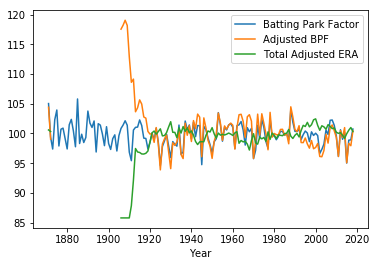

In [6]:
plotframe=yearframe
#.loc[yearframe.index>1999] 
plotframe[["Batting Park Factor","Adjusted BPF","Total Adjusted ERA"]].plot()

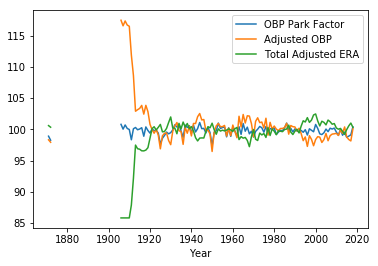

In [7]:
plotframe=yearframe
#.loc[yearframe.index>1999] 
plotframe[["OBP Park Factor","Adjusted OBP","Total Adjusted ERA"]].plot()

## Run this to assess a team

Please input a team code: COL


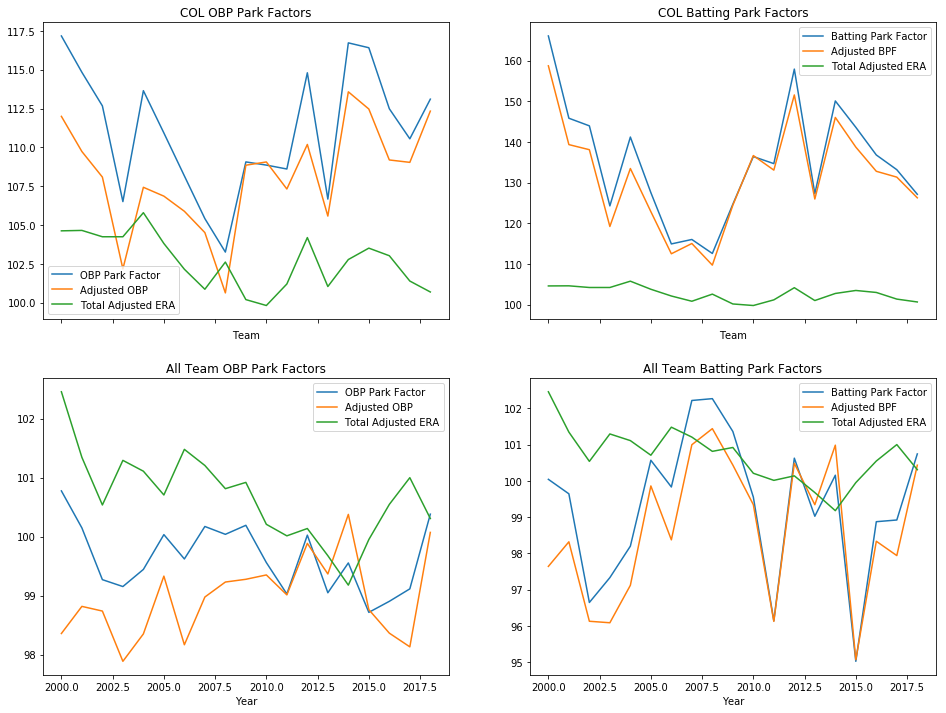

In [19]:
plotframe=yearframe.loc[yearframe.index>1999] 
teamcode=input("Please input a team code: ")
teamframe=bigframe.loc[bigframe["Year"]>1999]
teamframe=teamframe.loc[teamframe.index==teamcode]
mean=yearframe.loc[yearframe.index>2000]["Visiting ERA"].mean()
std=yearframe.loc[yearframe.index>2000]["Visiting ERA"].std()
teamframe["Adjusted Visiting ERA"]=((teamframe["Visiting ERA"]-mean)/std)+100
mean=yearframe.loc[yearframe.index>2000]["Home ERA"].mean()
std=yearframe.loc[yearframe.index>2000]["Home ERA"].std()
teamframe["Adjusted Home ERA"]=((teamframe["Home ERA"]-mean)/std)+100
teamframe["Total Adjusted ERA"]=(teamframe["Adjusted Home ERA"]+teamframe["Adjusted Visiting ERA"])/2
teamframe["Adjusted BPF"]=(teamframe["Batting Park Factor"]/(teamframe["Total Adjusted ERA"]))*100
teamframe["Adjusted OBP"]=(teamframe["OBP Park Factor"]/(teamframe["Total Adjusted ERA"]))*100
fig, axes = plt.subplots(figsize=(16, 12),nrows=2, ncols=2)
teamframe.set_index(["Year"])
teamframe[["OBP Park Factor","Adjusted OBP","Total Adjusted ERA"]].plot(title="{} OBP Park Factors".format(teamcode),ax=axes[0,0])
teamframe[["Batting Park Factor","Adjusted BPF","Total Adjusted ERA"]].plot(title="{} Batting Park Factors".format(teamcode),ax=axes[0,1])
plotframe[["OBP Park Factor","Adjusted OBP","Total Adjusted ERA"]].plot(title="All Team OBP Park Factors",ax=axes[1,0])
plotframe[["Batting Park Factor","Adjusted BPF","Total Adjusted ERA"]].plot(title="All Team Batting Park Factors",ax=axes[1,1])